## Pre-processing

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#NB

In [7]:
# ติดตั้งไลบรารีที่จำเป็น
!pip install gensim
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install pythainlp python-crfsuite
!pip install deepcut


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3522208561.py, line 7)

In [ ]:
from pythainlp import word_vector
import numpy as np
wv = word_vector.WordVector()

In [ ]:
!pip install fastai
!pip install https://github.com/PyThaiNLP/fastai-thai-models/releases/download/v0.1/thai2fit_0.0.1.tar.gz
!pip install scikit-learn


In [6]:
!pip install pythainlp fastai
!pip install emoji
!pip install joblib


In [8]:
import numpy as np
import pandas as pd
import re
import pythainlp
from pythainlp.corpus.common import thai_words
# from pythainlp.tokenize import dict_trie, word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import glob
import matplotlib.pyplot as plt
from pythainlp.tokenize import word_tokenize
%matplotlib inline

In [11]:
# Assuming you have the create_data function as you provided earlier
# Assuming you have the load_data function as you provided earlier

# Load the training and testing data from CSV files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Split the data into features (X) and labels (y)
X_train, y_train = train['wordseged_space_text'], train['sentiment']
X_test, y_test = test['wordseged_space_text'], test['sentiment']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)


In [12]:
print("Number of samples in validation set:", len(X_val))
print("Number of samples in validation set:", len(y_val))
print("Number of samples in validation set:", len(X_test))

Number of samples in validation set: 7818
Number of samples in validation set: 7818
Number of samples in validation set: 7818


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the validation data
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Now, you can use X_val_tfidf for prediction
y_val_pred = nb_classifier.predict(X_val_tfidf)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predictions on training and validation set
y_train_pred = nb_classifier.predict(X_train_tfidf)
y_val_pred = nb_classifier.predict(X_val_tfidf)

# Calculate accuracy on training and validation set
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {val_accuracy}')


# Predictions on the test set
y_test_pred = nb_classifier.predict(X_test_tfidf)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')

# Classification Report
print(classification_report(y_test, y_test_pred))



Training Accuracy: 0.7758591285068644
Validation Accuracy: 0.7155282680992581
Test Accuracy: 0.7129700690713737
              precision    recall  f1-score   support

           0       0.63      0.85      0.72      2606
           1       0.71      0.48      0.57      2606
           2       0.83      0.81      0.82      2606

    accuracy                           0.71      7818
   macro avg       0.72      0.71      0.71      7818
weighted avg       0.72      0.71      0.71      7818



In [27]:
import joblib
from sklearn.metrics import accuracy_score, classification_report

# Load the model from the file
loaded_nb_classifier = joblib.load('naive_bayes_model.pkl')

# Predictions on the validation set using the loaded model
y_val_pred_loaded = loaded_nb_classifier.predict(X_val_tfidf)

# Calculate accuracy on the validation set
val_accuracy_loaded = accuracy_score(y_val, y_val_pred_loaded)

print(f'Validation Accuracy (Loaded Model): {val_accuracy_loaded}')

# Classification Report for the loaded model
print(classification_report(y_val, y_val_pred_loaded))

# Save the validation results to a file
with open("validation_results.txt", "w") as file:
    file.write(f'Validation Accuracy (Loaded Model): {val_accuracy_loaded}\n\n')
    file.write('Classification Report:\n')
    file.write(classification_report(y_val, y_val_pred_loaded))


Validation Accuracy (Loaded Model): 0.7155282680992581
              precision    recall  f1-score   support

           0       0.63      0.85      0.72      2606
           1       0.71      0.48      0.57      2606
           2       0.84      0.82      0.83      2606

    accuracy                           0.72      7818
   macro avg       0.73      0.72      0.71      7818
weighted avg       0.73      0.72      0.71      7818



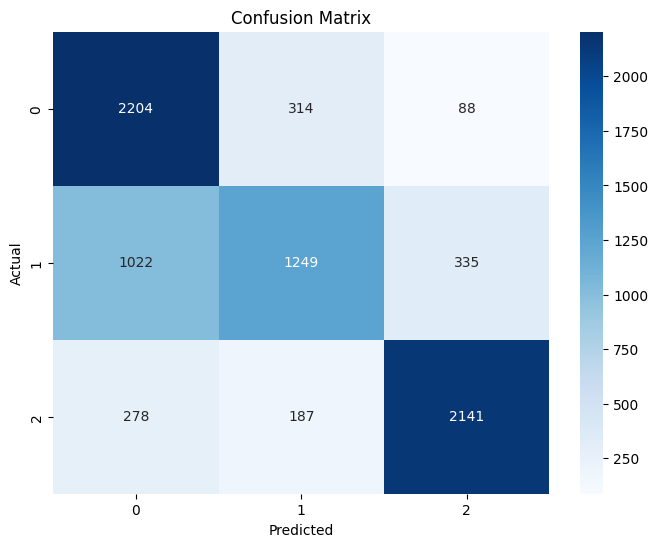

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Assuming X_val_tfidf contains your validation data as TF-IDF vectors and y_val contains corresponding labels
# Predictions on the validation set
y_val_pred = nb_classifier.predict(X_val_tfidf)

# Get unique labels in the dataset
labels = sorted(y_val.unique())

# Plot confusion matrix
plot_confusion_matrix(y_val, y_val_pred, labels)


In [24]:
X_val

3450     เอา จนได้ ประเทศ ซิบ หาย พอดี ออก ไป เถอะ ไป อ...
28160                            คุณ ชา ดา ทำ ถูกต้อง ครับ
2144                                     คน ที่ มี มือ พับ
22308    มัน จะ มี ผู้หญิง บาง ประเภท ที่ ชอบ คบ คน แก ...
29689                                       ไซ นา ไน เปล่า
                               ...                        
22644                                  สู้ ๆ นะคะ คุณ พิธา
23231                                       สว สุดยอด ครับ
19359    หนักแน่น ชัดเจน นี่ คือ คนรุ่นใหม่ นี่ คือ อนา...
17211    ตำรวจ น่าจะ ตะโกน ด่า ด้อม ส้ม จาก ด้านใน ออกม...
5346     น่ารัก มาก ลูก บุญ ใหญ่ ขอ เจริญ ๆ ถึง ไม่ ได้...
Name: wordseged_space_text, Length: 7818, dtype: object

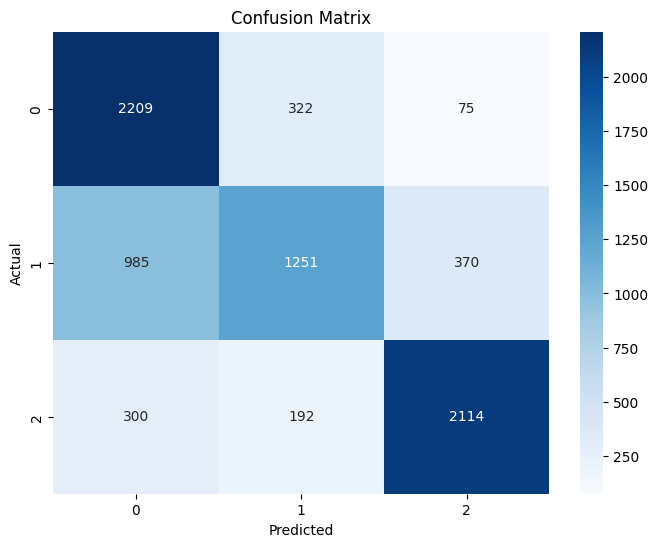

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Assuming you have already trained your Naive Bayes classifier and made predictions
# Replace the following line with your actual predictions
y_test_pred = nb_classifier.predict(X_test_tfidf)

# Get unique labels in the dataset
labels = sorted(y_test.unique())

# Plot confusion matrix
plot_confusion_matrix(y_test, y_test_pred, labels)



In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd


# Assuming you have already trained your Naive Bayes classifier and made predictions
# Replace the following line with your actual predictions
y_test_pred = nb_classifier.predict(X_test_tfidf)

# Get unique labels in the dataset
labels = sorted(y_test.unique())

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=labels)

# Convert confusion matrix to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_df)


Confusion Matrix:
      0     1     2
0  2151   384    71
1   898  1332   376
2   276   214  2116


In [28]:
from sklearn.metrics import classification_report

# Predictions on the test set
y_test_pred = nb_classifier.predict(X_test_tfidf)

# Classification Report
report = classification_report(y_test, y_test_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.63      0.85      0.72      2606
           1       0.71      0.48      0.57      2606
           2       0.83      0.81      0.82      2606

    accuracy                           0.71      7818
   macro avg       0.72      0.71      0.71      7818
weighted avg       0.72      0.71      0.71      7818



In [ ]:
# Display model parameters
print("Model Parameters:")
print(nb_classifier.get_params())

# Display model summary
print("\nModel Summary:")
print(nb_classifier)


Model Parameters:
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

Model Summary:
MultinomialNB()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

# Load the training and testing data from CSV files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Split the data into features (X) and labels (y)
X_train, y_train = train['wordseged_space_text'], train['sentiment']

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Display model parameters
print("Model Parameters:")
print(f"alpha: {nb_classifier.alpha}")
print(f"fit_prior: {nb_classifier.fit_prior}")
print(f"class_prior: {nb_classifier.class_prior}")

# Display model methods
print("\nModel Methods:")
print(f"fit(X, y): {nb_classifier.fit.__doc__}")
print(f"predict(X): {nb_classifier.predict.__doc__}")
print(f"predict_proba(X): {nb_classifier.predict_proba.__doc__}")
print(f"score(X, y): {nb_classifier.score.__doc__}")


Model Parameters:
alpha: 1.0
fit_prior: True
class_prior: None

Model Methods:
fit(X, y): Fit Naive Bayes classifier according to X, y.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Training vectors, where `n_samples` is the number of samples and
            `n_features` is the number of features.

        y : array-like of shape (n_samples,)
            Target values.

        sample_weight : array-like of shape (n_samples,), default=None
            Weights applied to individual samples (1. for unweighted).

        Returns
        -------
        self : object
            Returns the instance itself.
        
predict(X): 
        Perform classification on an array of test vectors X.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            The input samples.

        Returns
        -------
        C : ndarray of shape (n_samples,)
            Predicted targ